#Note: The whole code was run by me on jupyter notebook, which I have attached with this along, The output was taken from there. THE PARTS A to E ARE EXECUTED ON BOTH THE FILES. I REQUEST YOU TO CHECK THE OTHER FILE AS WELL.


 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each having a variance of 0.3. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.
2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Write a function called kNNClassify that accepts training data, a test point, and the hyperparameter 'k' as input and returns the label of the test point. Pick a reasonable 'k' for this experiment. Use "kNNClassify" function to generate the labels for the test data generated in part(a) of this PA. Compare the predicted labels with the original labels and calculate the portion of test data points that are correctly classified. In other words, calculate the accuracy of the classifier.
3. Create a visual representation of the predictions by plotting all data points in a 2D plane. Assign green and blue colors to represent class 1 and class 2, respectively. For test data points that are misclassified, assign the color red.
4. Generate and visualize the decision regions of 2D plane that are associated with each class, for a given classifier. Decision regions can be created by classifying all the data points in the 2D grid and assigning class-specific colors to them.

<b> Part(c): Parameter selection: What is good value for k? - </b> One intuitive approach to determine the optimal 'k' is through cross-validation. During cross-validation, a ρ% portion of the training dataset is utilized as the validation dataset, and the model's performance is assessed on this validation set with various 'k' values. Through these cross-validation experiments, we select the 'k' that yields the best performance on the validation data.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check
if there is an improvement on the classification error over the result of Part 2.

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.
2. Try classifying more difficult datasets, for instance, by increasing the variance or adding noise by randomly flipping the labels on the training set.

<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> : This part will not be graded. However, you are recommended to work on it to get exposure to the practical applications of the KNN classifier.

1. Modify the function kNNClassify to handle multi-class problems and hence design a KNN classifier to classify the images in MNIST dataset as one of the 10 digits. The 28x28 images may be flattened to arrive at a 784 dimensional vector. NOTE: If you had already written a kNNClassify for multi class classification in part1 (b), you are free to use it.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%.
3. Empirically determine the most suitable error function, and the corresponding k to maximize the performance on the cross-validation experiments.
4. Apply these values to evaluate the performance on the test dataset.
5. Create a confusion matrix to understand the most confused classes (digits).
6. Suggest alternate ways to improve the performance.



In [ ]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

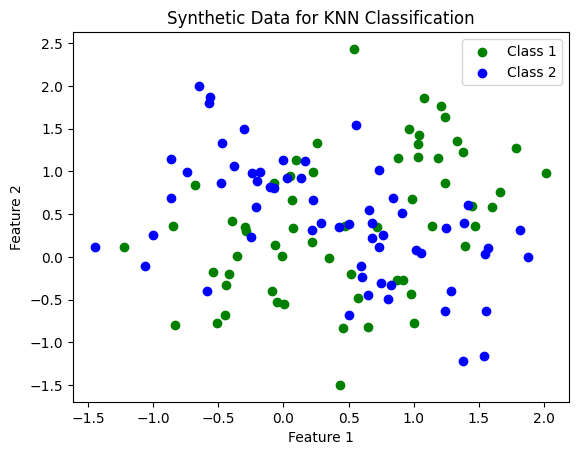

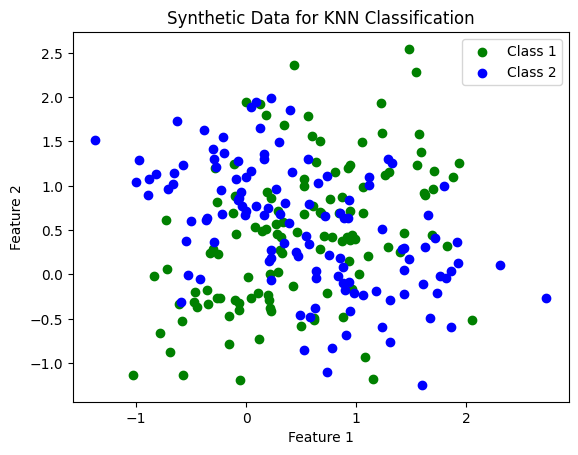

In [ ]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
mean1 = (0, 0)
mean2 = (0, 1)
mean3 = (1, 0)
mean4 = (1, 1)
cov=np.array([[0.3, 0], [0, 0.3]])

#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
Data_points1=np.random.multivariate_normal(mean1,cov,90)
Data_points2=np.random.multivariate_normal(mean2,cov,90)
Data_points3=np.random.multivariate_normal(mean3,cov,90)
Data_points4=np.random.multivariate_normal(mean4,cov,90)

class1=np.concatenate((Data_points1,Data_points4),axis=0)
class2=np.concatenate((Data_points2,Data_points3),axis=0)
Full_data=np.concatenate((Data_points1,Data_points2,Data_points3,Data_points4),axis=0)
label1=np.ones(180)
label2=np.ones(180)
label2=label2 - 2
label=np.concatenate((label1,label2))

#Generate training data
X_train=np.concatenate((Data_points1[:30],Data_points4[:30],Data_points2[:30],Data_points3[:30]),axis=0)
X_test=np.concatenate((Data_points1[30:],Data_points4[30:],Data_points2[30:],Data_points3[30:]),axis=0)
y_test=np.concatenate((label1[30:90],label1[120:],label2[30:90],label2[120:]))
y_train=np.concatenate((label1[:30],label1[90:120],label2[:30],label2[90:120]))

#Generate testing data


#Visualize the data using plt.scatter() function
plt.scatter(X_train[:60, 0], X_train[:60, 1], c='green', label='Class 1')
plt.scatter(X_train[60:, 0], X_train[60:, 1], c='blue', label='Class 2')

plt.title('Synthetic Data for KNN Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

plt.scatter(X_test[:120, 0], X_test[:120, 1], c='green', label='Class 1')
plt.scatter(X_test[120:, 0], X_test[120:, 1], c='blue', label='Class 2')

plt.title('Synthetic Data for KNN Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



Accuracy = 67.91666666666667 for k = 21 


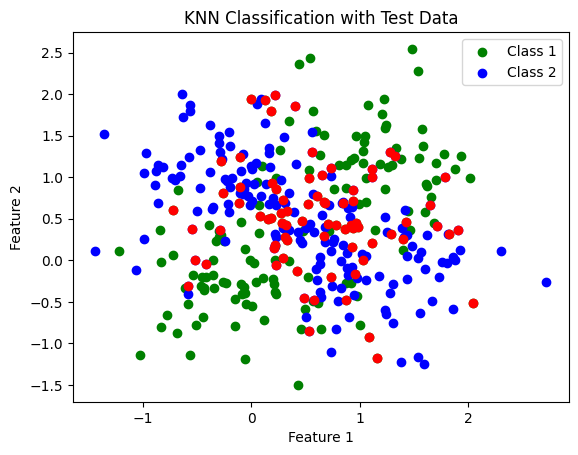

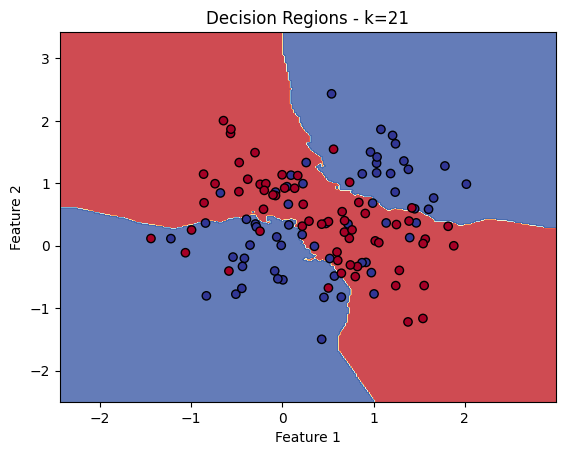

In [ ]:
def kNNClassify(X_train, Y_train, X_test, k):
    '''
    Inputs: Training data (X_train, Y_train), Test points (X_test), Hyperparameter k
    Outputs: Predicted class
    '''
    pred = []

    for x_test in X_test:
        distances = []
        for x_train in X_train:
            distance = np.linalg.norm(x_train - x_test)
            distances.append(distance)

        knn = np.argsort(distances)[:k]
        l2 = np.sum(Y_train[knn] == -1)
        l1 = len(knn) - l2
        pred.append(1 if l1 > l2 else -1)

    return pred


def KNNAccuracy(true,pred):
  '''
  #Inputs : Ground truth and predicted labels
  #Outputs : Portion of data points that are correctly classified, i.e., accuracy
  '''
  #Algorithm
  #1. Iterate through the total number of predictions
  #2.     Verify wheter the ground truth matches with the predictions
  #3. Compute and return the percentage of the correctly classified points
  #Fill the code
  true=np.array(true)
  pred=np.array(pred)

  count=np.sum(true==pred)

  return (count/len(true))*100

pred=kNNClassify(X_train,y_train,X_test,21)
Accuracy = KNNAccuracy(y_test,pred)
print(f"Accuracy = {Accuracy} for k = 21 ")

plt.scatter(class1[:, 0], class1[:, 1], c='green', label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], c='blue', label='Class 2')

for i in range(len(X_test)):
    if pred[i] != y_test[i]:
      plt.scatter(X_test[i][0], X_test[i][1], c='red')



plt.title('KNN Classification with Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

def plot_decision_regions(X, y, classifier, k):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = classifier(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    Z = np.array(Z).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o')

    plt.title(f'Decision Regions - k={k}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

k_value = 21

plot_decision_regions(X_train, y_train, kNNClassify, k_value)


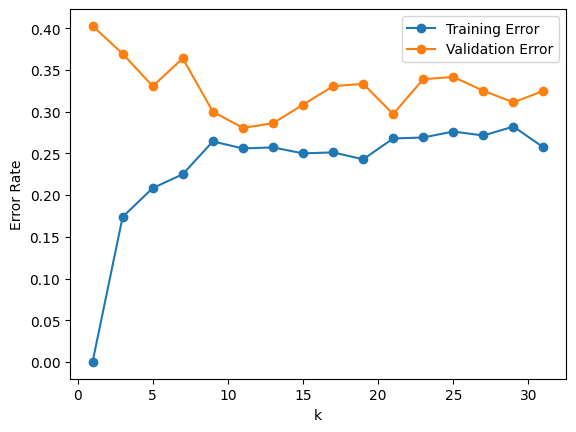

best value of k 11


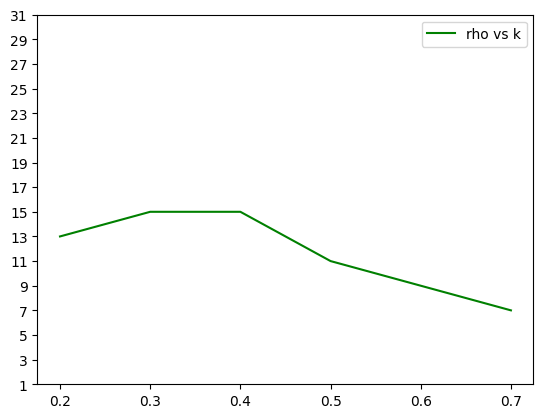

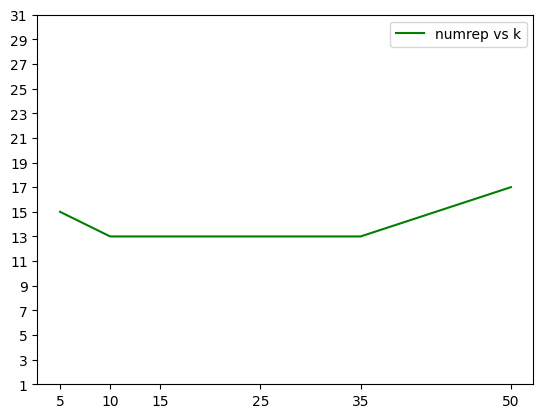

Accuracy at best k 67.91666666666667


In [ ]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range,numrep,rho):
  #Iterate through range of k values
    #Iterate through number of repetations
      #Hold out rho fraction of training data in each repetition.
  train_error=[]
  val_error=[]
  for i in k_range:
    k_train_errors=[]
    k_val_errors=[]
    for rep in range(numrep):
      val_indices = np.random.choice(len(X_train), int(rho * len(X_train)), replace=False)
      X_val = X_train[val_indices]
      y_val = y_train[val_indices]
      all_indices=np.arange(120)
      mask = np.isin(all_indices, val_indices, invert=True)
      train_indices = all_indices[mask]
      X_tra=X_train[train_indices]
      y_tra=y_train[train_indices]

      train_pred = kNNClassify(X_tra, y_tra, X_tra, i)
      k_train_errors.append(1 - KNNAccuracy(y_tra, train_pred) / 100)

      val_pred = kNNClassify(X_tra, y_tra, X_val, i)
      k_val_errors.append(1 - KNNAccuracy(y_val, val_pred) / 100)

    train_error.append(np.mean(k_train_errors))
    val_error.append(np.mean(k_val_errors))

  return train_error,val_error

k_range =[1,3, 5, 7, 9, 11, 13, 15, 17, 19, 21,23,25,27,29,31]
train_errors, val_errors = holdoutCVkNN(k_range,10,0.3)

  #Return errors on training and validation data



#Plot training and validation errors for different values of k

plt.plot(k_range, train_errors, marker='o', label='Training Error')
plt.plot(k_range, val_errors, marker='o', label='Validation Error')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.legend()
plt.show()


#what is the best value for k?
best_k=k_range[np.argmin(val_errors)]
print(f"best value of k {best_k}")



#Effect of rho and number repetations on k

rho_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
numrep_values = [5, 10, 15, 25, 35 ,50]
one_more=[]

for r in rho_values:
  train_errors, val_errors = holdoutCVkNN(k_range,10,r)
  best_k=k_range[np.argmin(val_errors)]
  one_more.append(best_k)

plt.figure()
plt.plot(rho_values,one_more,label="rho vs k", c="green")
plt.legend()
plt.xticks(rho_values)
plt.yticks(k_range)
plt.show()

one_more=[]
for r in numrep_values:
  train_errors, val_errors = holdoutCVkNN(k_range,r,0.3)
  best_k=k_range[np.argmin(val_errors)]
  one_more.append(best_k)

plt.figure()
plt.plot(numrep_values,one_more,label="numrep vs k", c="green")
plt.legend()
plt.xticks(numrep_values)
plt.yticks(k_range)
plt.show()


#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).


pred=kNNClassify(X_train,y_train,X_test,best_k)
Accuracy = KNNAccuracy(y_test,pred)
print(f"Accuracy at best k {Accuracy}")

**Part(c) Answers**

5) We can find the best K possible by iterating over the values of the validation error obtained by running the function and finding the minimum from it. The k value corresponding to the minimum validation error is the probably the best k with least error on the training set. Three different zones direct the search for the ideal k in model selection. The underfitting zone, which is denoted by large validation and training errors, shows that k should be lowered since the model is too simple. By balancing bias and variance, the optimal zone—detected by the lowest validation error—offers the best generalization trade-off without overfitting. A model's complexity is shown in the overfitting zone by a growing validation error combined with a falling training error, which makes the model favor simpler solutions and causes k to increase. Finding the value that yields the lowest validation error is ultimately what determines the ideal k, and maintaining a careful balance between variance and bias is necessary for the model to function well.


6) Effect of rho and numrep on k: In general, as we can say from the graph plotted above that, the value of k deecreases as the value of rho is increased.On increasing the value of rho, the training points decrease, which results in a bit more improper training dataset, thus fluctuating the value of k in the cases. On the other hand, nothing in general can be said about the variation of numrep on k. Since we are repeating the experiment multiple times, other important factors are eliminated and the solution becomes more stable as the value of numrep increases.

7) No improvement can be seen in the accuracy, as seen above.In some other cases there is increase in accuracy depicting that the model performs similar for validation and testing data set. But in some other cases, there can be seen a decrease as well. This implies that the selected hyperparameter might not be the best fit for the test data, perhaps as a result of the test set's sensitivity to changes. The mismatch highlights the significance of assessing model performance on the test set, highlighting that although hyperparameter selection is aided by cross-validation, test set performance ultimately determines real-world applicability. The decline in accuracy emphasizes the necessity of judicious hyperparameter tuning that takes into account the unpredictability of the dataset and acknowledges that particular values might not always improve generalization across other datasets.


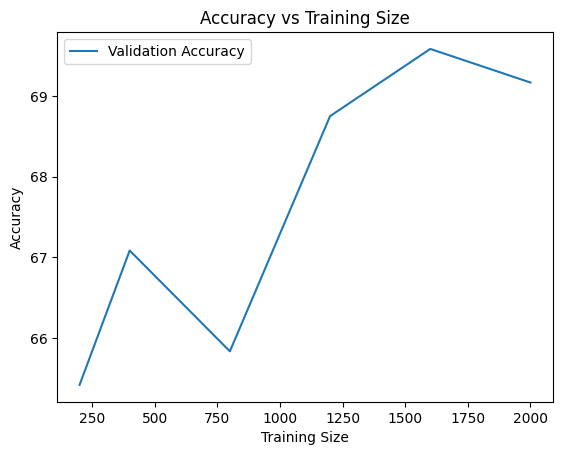

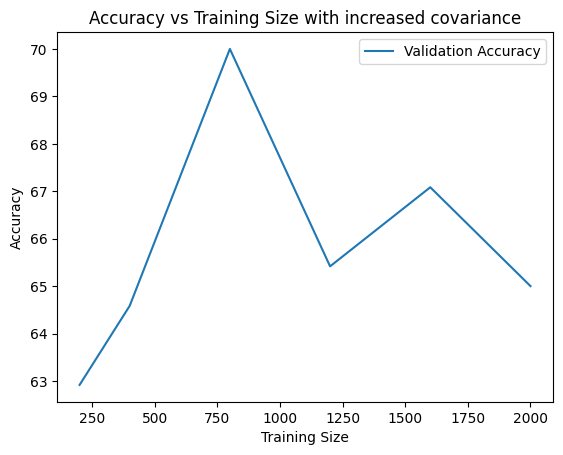

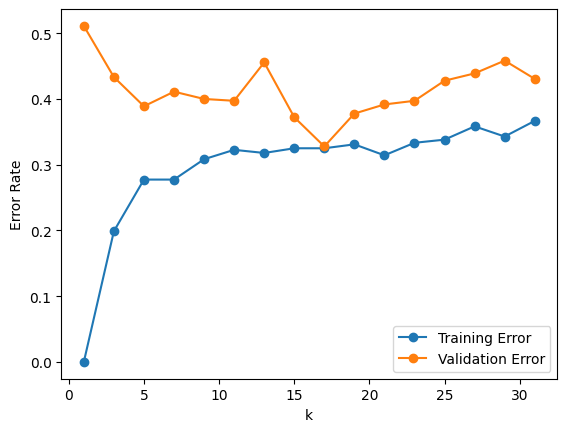

best k if added noise of 12.5% is 17
Accuracy corresponding to it is 60.0


In [ ]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
# Function to evaluate KNN performance with varying training set sizes
cov2=np.array([[0.8, 0], [0, 0.8]])


def diff_size_knn(train_sizes,numrep, rho,X_test, Y_test,covariance):
    accuracies_train = []
    accuracies_val = []
    for size in train_sizes:
      Data_points_e1=np.random.multivariate_normal(mean1,covariance,int(size/4))
      Data_points_e2=np.random.multivariate_normal(mean2,covariance,int(size/4))
      Data_points_e3=np.random.multivariate_normal(mean3,covariance,int(size/4))
      Data_points_e4=np.random.multivariate_normal(mean4,covariance,int(size/4))

      class_e1=np.concatenate((Data_points_e1,Data_points_e4),axis=0)
      class_e2=np.concatenate((Data_points_e2,Data_points_e3),axis=0)
      X_train_e=np.concatenate((Data_points_e1,Data_points_e4,Data_points_e2,Data_points_e3),axis=0)
      label_e1=np.ones(int(size/2))
      label_e2=np.ones(int(size/2))
      label_e2=label_e2 - 2
      y_train_e=np.concatenate((label_e1,label_e2))
      train_error=[]
      val_error=[]
      k_range=[]
      for z in range(8):
        value = int(math.sqrt(size) - size/50 + (size/100) * z)
        if value > 0 and value <= (math.sqrt(size) + size/20):
          k_range.append(value)

      for i in k_range:
        k_train_errors=[]
        k_val_errors=[]
        for rep in range(numrep):
          val_indices = np.random.choice(len(X_train_e), int(rho * len(X_train_e)), replace=False)
          X_val = X_train_e[val_indices]
          y_val = y_train_e[val_indices]
          all_indices=np.arange(size)
          mask = np.isin(all_indices, val_indices, invert=True)
          train_indices = all_indices[mask]
          X_tra=X_train_e[train_indices]
          y_tra=y_train_e[train_indices]

          train_pred = kNNClassify(X_tra, y_tra, X_tra, i)
          k_train_errors.append(1 - KNNAccuracy(y_tra, train_pred) / 100)

          val_pred = kNNClassify(X_tra, y_tra, X_val, i)
          k_val_errors.append(1 - KNNAccuracy(y_val, val_pred) / 100)

        train_error.append(np.mean(k_train_errors))
        val_error.append(np.mean(k_val_errors))

      best_k=k_range[np.argmin(val_error)]

      pred=kNNClassify(X_train_e,y_train_e,X_test,best_k)
      accuracies_val.append(KNNAccuracy(y_test,pred))

    return accuracies_train,accuracies_val

# Assuming X_train, y_train, X_test, y_test are already defined
train_sizes = [200, 400, 800, 1200, 1600, 2000]
num_repetitions = 5
rho_value = 0.3  # Adjust as needed
accuracies_train,accuracies_val = diff_size_knn(train_sizes, num_repetitions, rho_value,  X_test, y_test,cov)


plt.plot(train_sizes, accuracies_val, label='Validation Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Training Size')
plt.legend()
plt.show()

accuracies_train,accuracies_val = diff_size_knn(train_sizes, num_repetitions, rho_value,  X_test, y_test,cov2)


plt.plot(train_sizes, accuracies_val, label='Validation Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Training Size with increased covariance')
plt.legend()
plt.show()


def add_noise(k_range,numrep,rho):
  train_error=[]
  val_error=[]

  for i in k_range:
    k_train_errors=[]
    k_val_errors=[]
    for rep in range(numrep):
      val_indices = np.random.choice(len(X_train), int(rho * len(X_train)), replace=False)
      X_val = X_train[val_indices]
      y_val = y_temp[val_indices]
      train_indices = [i for i in range(120) if i not in val_indices]
      X_tra=X_train[train_indices]
      y_tra=y_temp[train_indices]

      train_pred = kNNClassify(X_tra, y_tra, X_tra, i)
      k_train_errors.append(1 - KNNAccuracy(y_tra, train_pred) / 100)

      val_pred = kNNClassify(X_tra, y_tra, X_val, i)
      k_val_errors.append(1 - KNNAccuracy(y_val, val_pred) / 100)

    train_error.append(np.mean(k_train_errors))
    val_error.append(np.mean(k_val_errors))

  return train_error,val_error

random_indices = np.random.choice(len(X_train), int(0.125*len(X_train)), replace=False)
y_temp=y_train
y_temp[random_indices]*=-1
k_range =[1,3, 5, 7, 9, 11, 13, 15, 17, 19, 21,23,25,27,29,31]
train_errors, val_errors = add_noise(k_range,10,0.3)

plt.plot(k_range, train_errors, marker='o', label='Training Error')
plt.plot(k_range, val_errors, marker='o', label='Validation Error')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

best_k=k_range[np.argmin(val_errors)]
print(f"best k if added noise of 12.5% is {best_k}")

pred=kNNClassify(X_train,y_train,X_test,best_k)
Accuracy = KNNAccuracy(y_test,pred)
print(f"Accuracy corresponding to it is {Accuracy}")

**Part (d)**

1) a) The range of n was chosen on some specific studies from google: Mostly the error is minimized when the k is chosen to be root(n), so the range is mostly chosen for some values around root(n), around root(n)- n/50 to root(n) + n/20 with a gap of n/100.

b) Also, it can be seen that the value of accuracy is almost constant, increases a bit as the value of n increases, and after sometime is more or less constant.

Accuracy for chebyshev is 64.58333333333334
Accuracy for manhattan is 60.0


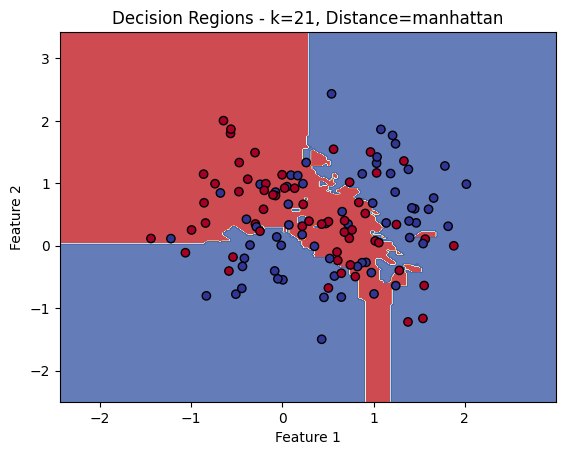

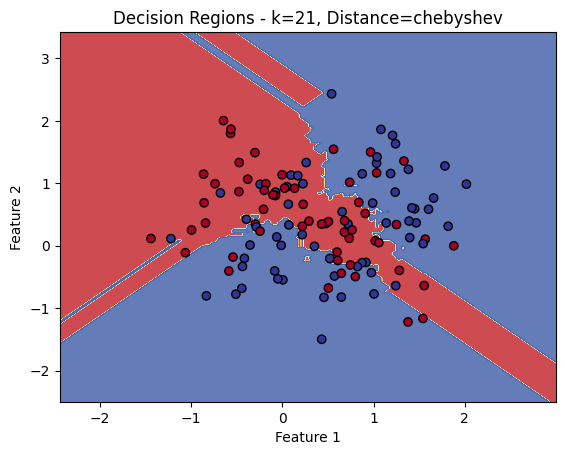

In [ ]:
##################################
#Part(e): Influence of distance measure on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance measures
def kNNClassifyDistance(X_train, Y_train, X_test, k, distance):
    '''
    Inputs: Training data (X_train, Y_train), Test points (X_test), Hyperparameter k
    Outputs: Predicted class
    '''
    pred = []

    for x_test in X_test:
      distances = []
      for x_train in X_train:
        if distance == 'manhattan':
          distances.append(np.sum(np.abs(x_train - x_test)))
        elif distance == 'chebyshev':
          distances.append(np.max(np.abs(x_train - x_test)))
        elif distance == 'euclidian':
          distance = np.linalg.norm(x_train - x_test)
          distances.append(distance)



      knn = np.argsort(distances)[:k]
      l2 = np.sum(Y_train[knn] == -1)
      l1 = len(knn) - l2
      pred.append(1 if l1 > l2 else -1)

    return pred

pred=kNNClassifyDistance(X_train,y_train,X_test,21,'chebyshev')
Accuracy = KNNAccuracy(y_test,pred)
print(f"Accuracy for chebyshev is {Accuracy}")

pred=kNNClassifyDistance(X_train,y_train,X_test,21,'manhattan')
Accuracy = KNNAccuracy(y_test,pred)
print(f"Accuracy for manhattan is {Accuracy}")

def plot_decision_regions(X, y, classifier, k, distance):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = classifier(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, distance)
    Z = np.array(Z).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o')

    plt.title(f'Decision Regions - k={k}, Distance={distance}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


plot_decision_regions(X_train, y_train, kNNClassifyDistance, 21, 'manhattan')
plot_decision_regions(X_train, y_train, kNNClassifyDistance, 21, 'chebyshev')



**Part (e)**:

Euclidean Distance:  This is the most common metric type. The region is divided mostly in some spherical format and shapes. Points within the same circle or sphere are assigned to the same class.


Chebyshev Distance: It can be observed that forms some lines. Some geometrical shapes like square type region or hyper-rectangle like boundaries are formed.The greatest absolute difference in any dimension establishes boundaries.

Manhattan Distance: This distance metric forms boundaries similar to that of the Chebyshev Distance. They tend to have the boundaries along the axes.Because of the total absolute disparities along each dimension, boundaries follow the axes.

In [ ]:
##################################
#Part(f): Influence of distance measure on KNN classifier
##################################

#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
images = mnist.data
targets = mnist.target
#Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

#Create train, validation and test splits
num_samples = len(images)
num_train = int(0.8 * num_samples)
num_val = int(0.1 * num_samples)
num_test = num_samples - num_train - num_val

indices = np.random.permutation(num_samples)
train_indices = indices[:num_train]
val_indices = indices[num_train:num_train+num_val]
test_indices = indices[num_train+num_val:]

X_train_mnist, y_train_mnist = images[train_indices], targets[train_indices]
X_val_mnist, y_val_mnist = images[val_indices], targets[val_indices]
X_test_mnist, y_test_mnist = images[test_indices], targets[test_indices]


def MultiClassKNNClassify(X_train, Y_train, X_test, k, distance_metric='euclidean'):
  num_test_samples = len(X_test)
  num_train_samples = len(X_train)
  predictions = []


  for x_test in X_test:
    distances=[]
    for x_train in X_train:
      if distance_metric == 'manhattan':
          distances.append(np.sum(np.abs(x_train - x_test)))
      elif distance_metric == 'chebyshev':
          distances.append(np.max(np.abs(x_train - x_test)))
      elif distance_metric == 'euclidean':
          distance = np.linalg.norm(x_train - x_test)
          distances.append(distance)
    sorted_indices=np.argsort(distances)[:k]
    knn=y_train_mnist[sorted_indices]

    label_counts={}
    for val in knn:
      label_counts[val]=label_counts.get(val, 0) + 1
    max=0
    for key in label_counts:
      if(int(label_counts[key])>int(max)):
        max=key
    predictions.append(max)

  return predictions



k_range_mnist=[30,50,70,80,100,120,170,200,250,350,600,1000]
k_mnist=[]
for k in k_range_mnist:
  pred = MultiClassKNNClassify(X_train_mnist, y_train_mnist, X_val_mnist, k)
  accuracy = KNNAccuracy(y_val_mnist, pred)
  print(k)
  print(accuracy)
  k_mnist.append((accuracy))

best_k=k_range_mnist[np.argmax(k_mnist)]
print(best_k)

best_distance = []
distance_metrics = ['euclidean','chebyshev','manhattan']

for distance_metric in distance_metrics:
    pred = MultiClassKNNClassify(X_train_mnist, y_train_mnist, X_val_mnist, best_k, distance_metric)
    accuracy = KNNAccuracy(y_val_mnist, pred)
    print(accuracy)
    best_distance.append((accuracy))

best_d=distance_metrics[np.argmax(np.array((best_distance)))]

pred = MultiClassKNNClassify(X_train_mnist, y_train_mnist, X_test_mnist, best_k, best_d)
accuracy = KNNAccuracy(y_test_mnist, pred)
print(accuracy)



#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    '''
    Inputs: Ground truth labels and classifier predictions
    Outputs: Confusion matrix
    '''
    num_classes = max(max(true), max(pred)) + 1
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(true, pred):
        conf_matrix[true, pred] += 1


    return conf_matrix

matrix = compute_confusion_matrix(np.array(y_test_mnist).astype(int),np.array(pred).astype(int))
print(matrix)



#Note: The whole code was run by me on jupyter notebook, which I have attached with this along, The output was taken from there.

###Note: We can observe that the accuracy on validation data set increases even if the value of k is decreased a lot, on further observations, value of k = 15, also give very good results. This is because of the large amount of dataset. There are multiple very similar images, which gives nearly 0 distance for the images. Thus, we get very good results even if we decrease k by a great factor.


Alternate ways to improve performance :

One way to improve performance is by scaling the pixel values to 0 and 1. This can improve convergence and overall performance.

We can also improve the performance by normalizing all the values around their mean such that mean of the values is 0.

We can apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset. MNIST images have 784 pixels, and PCA can help capture the most important features while significantly reducing the computational load.

#### Best Accuracy:
    K=30,
    On Validation set: 89.31428571428572
    On training Set: 89.47142857142858

The confusion matrix gives decent idea about the code, and tells me how many points were predicated accurately which are on the diagonal. Other points not on the diagonal represent information about the points that were not executed properly.

- *Overall Accuracy:* The diagonal elements of the confusion matrix represent the number of instances correctly classified for each digit. The sum of these diagonal elements provides the overall accuracy of the classifier on the training data.

- *Digit-specific Performance:*
  - *Digit '0':*
    - Correctly classified: 625
    - Commonly confused with digits '5' and '6'.

  - *Digit '1':*
    - Correctly classified: 774
    - Minimal confusion, indicating high accuracy.

  - *Digit '2':*
    - Correctly classified: 560
    - Confusion with digits '1', '3', '7', and '8'.

  - *Digit '3':*
    - Correctly classified: 596
    - Confusion with digits '1', '5', '6', '8', and '9'.

  - *Digit '4':*
    - Correctly classified: 537
    - Significant confusion with digit '9'.

  - *Digit '5':*
    - Correctly classified: 595
    - Confusion with digits '3' and '9'.

  - *Digit '6':*
    - Correctly classified: 634
    - Confusion with digits '1', '5', and '9'.

  - *Digit '7':*
    - Correctly classified: 665
    - Confusion with digits '1', '4', '9', and '10'.

  - *Digit '8':*
    - Correctly classified: 576
    - Confusion with digits '1', '3', '9', and '10'.

  - *Digit '9':*
    - Correctly classified: 701
    - Confusion with digits '4' and '8'.

- *Commonly Confused Digits:*
  - Digits '1', '5', '6', '8', and '9' are frequently confused with other digits, indicating potential areas for improvement.


This analysis highlights the classifier's strengths and areas for improvement on the MNIST training data, based on the confusion matrix.

High value in some other entries other than the diagonal elements indicate that misclassification occurs between '3' and '5', 2 and 7, 4 and 9 because of there similar structure.


<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution

2. Write down the best accuracy on MNIST validation and test data.

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data

4.